## Lineare Regression
----------------------------------------

Die <a href="https://de.wikipedia.org/wiki/Regressionsanalyse">Regressionsanalyse</a> ist ein statistisches Verfahren zur Schätzung der Beziehungen zwischen zwei oder mehr Variablen. Die Beziehung wird als $y \sim x$ oder $y=f(x)$ modelliert. Beide Modellbeschreibungen besagen, dass die Variable $y$ eine Funktion von $x$ ist. Daher wird die Variable $y$ als **Antwortvariable** oder **abhängige Variable** bezeichnet, während die Variable $x$ als **Prädikatorvariable** oder **unabhängige Variable** bezeichnet wird.

In [2]:
%matplotlib inline
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules
%autoreload 2
# black formatter for jupyter notebooks
#%load_ext nb_black
# black formatter for jupyter lab
%load_ext lab_black

%run ../../src/notebook_env.py


---------------------------------
Working on the host: Joachims-MacBook-Pro.local

---------------------------------
Python version: 3.10.2 | packaged by conda-forge | (main, Feb  1 2022, 19:30:18) [Clang 11.1.0 ]

---------------------------------
Python interpreter: /opt/miniconda3/envs/srh/bin/python


## Einfache lineare Regression

In diesem Abschnitt wird eine spezielle Art der Regression behandelt, die als <a href="https://de.wikipedia.org/wiki/Lineare_Einfachregression">einfache lineare Regression</a> bezeichnet wird. In diesem speziellen Fall der Regressionsanalyse wird die Beziehung zwischen der Antwortvariablen $y$ und der Prädikatorvariablen $x$ in Form einer **linearen** Gleichung dargestellt

$$y= a + bx\text{,}$$

wobei $a$ und $b$ Konstanten sind. Die Zahl $a$ wird als **Achsenabschnitt** bezeichnet und definiert den Schnittpunkt der Regressionslinie mit der $y$-Achse ($x=0$). Die Zahl $b$ wird als **Regressionskoeffizient** bezeichnet. Er ist ein Maß für die Steigung der **Regressionsgeraden**. So gibt $b$ an, um wie viel sich der $y$-Wert ändert, wenn sich der $x$-Wert um $1$ Einheit erhöht. Das Adjektiv **einfach** bezieht sich auf die Tatsache, dass die Ergebnisvariable mit einem einzigen Vorhersagewert verknüpft ist. Das Modell wird als **deterministisches Modell** betrachtet, da es eine genaue Beziehung zwischen $x$ und $y$ herstellt.

Lassen Sie uns ein einfaches Beispiel betrachten. Gegeben ist eine Grundgesamtheit von $n=3$ Punkten mit kartesischen Koordinaten ($x_i,y_i$) von ($1,6$), ($2,8$) und ($3,10$). Diese Punkte liegen auf einer Geraden und können daher durch ein lineares Gleichungsmodell in der Form $y=a+bx$ beschrieben werden, wobei der Schnittpunkt $a=4$ und $b=2$ ist.

Text(0, 0.5, 'Abhängige Variable')

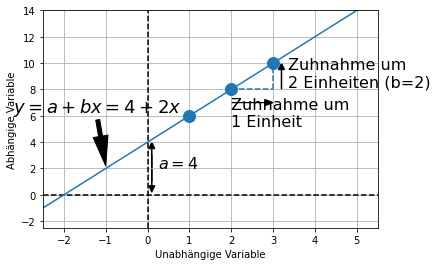

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
points = [(1, 6), (2, 8), (3, 10)]
for xy in points:
    ax.plot(xy[0], xy[1], "o", color="C0", markersize=12)
ax.axhline(0, color="k", linestyle="dashed")
ax.axvline(0, color="k", linestyle="dashed")
xaxis = np.linspace(-3, 6, 100)
y = 2 * xaxis + 4
ax.plot(xaxis, y)

xaxis = np.linspace(2, 3, 10)
y = [8] * 10
ax.plot(xaxis, y, color="C0", linestyle="dashed")

yaxis = np.linspace(8, 10, 10)
x = [3] * 10
ax.plot(x, yaxis, color="C0", linestyle="dashed")

ax.annotate(
    r"$y = a + bx = 4 + 2x$",
    xy=(-1, 2.2),
    xytext=(-1.2, 6.3),
    arrowprops=dict(headwidth=15, headlength=30, width=4, color="k"),
    size=18,
    horizontalalignment="center",
)

ax.arrow(x=2, y=7, dx=0.8, dy=0, head_width=0.5, head_length=0.2, color="k")

ax.arrow(
    x=3.2, y=8, dx=0, dy=1.5, head_width=0.15, head_length=0.5, color="k", width=0.0125
)

ax.arrow(
    x=0.1,
    y=3,
    dx=0,
    dy=-2.3,
    head_width=0.15,
    head_length=0.5,
    color="k",
    width=0.0125,
)

ax.arrow(
    x=0.1,
    y=1,
    dx=0,
    dy=2.5,
    head_width=0.15,
    head_length=0.5,
    color="k",
    width=0.0125,
)

ax.text(s="$a=4$", x=0.25, y=2, size=16)
ax.text(s="Zuhnahme um\n1 Einheit", x=2, y=5.2, size=16)
ax.text(s="Zuhnahme um\n2 Einheiten (b=2)", x=3.35, y=8.2, size=16)
ax.grid()
ax.set_xlim(-2.5, 5.5)
ax.set_ylim(-2.5, 14)
ax.set_xlabel("Unabhängige Variable")
ax.set_ylabel("Abhängige Variable")

In vielen Fällen ist die Beziehung zwischen zwei Variablen $x$ und $y$ jedoch nicht exakt. Das liegt daran, dass die Antwortvariable $y$ von anderen unbekannten und/oder zufälligen Prozessen beeinflusst wird, die von der Prädikatorvariable $x$ nicht vollständig erfasst werden. In einem solchen Fall liegen die Datenpunkte nicht auf einer Geraden. Die Daten können jedoch immer noch einer zugrunde liegenden linearen Beziehung folgen. Um diese Unbekannten zu berücksichtigen, wird der linearen Modellgleichung ein **Zufallsfehlerterm**, bezeichnet mit $\epsilon$, hinzugefügt, was im Gegensatz zum oben beschriebenen deterministischen Modell zu einem **probabilistischen Modell** führt.

$$y = a + b x + \epsilon$$

wobei angenommen wird, dass der Fehlerterm $\epsilon_i$ aus unabhängigen normalverteilten Werten besteht, $\epsilon_i \sim N(0,\sigma^2)$.

Bei der linearen Regressionsmodellierung werden folgende Annahmen über das Modell getroffen ({cite:t}`fahrmeirstatistik` s.439, {cite:t}`Frost2018`).

- Der zufällige Fehlerterm $\epsilon$ hat für jedes $x$ einen Mittelwert gleich Null.
- Die mit verschiedenen Beobachtungen verbundenen Fehler sind unabhängig.
- Für jedes gegebene $x$ ist die Verteilung der Fehler normal.
- Die Verteilung der Fehler für jedes $x$ hat die gleiche (konstante) Standardabweichung, die mit $\sigma_\epsilon$ bezeichnet wird.

Betrachten wir ein weiteres Beispiel. Diesmal nehmen wir eine Zufallsstichprobe mit dem Stichprobenumfang $n=8$ aus einer Grundgesamtheit. Um zu betonen, dass die Werte des Abschnitts und der Steigung aus Stichprobendaten berechnet werden, werden $a$ und $b$ mit $\beta_0$ bzw. $\beta_1$ bezeichnet. Außerdem wird der Fehlerterm $\epsilon$ als $e$ bezeichnet. $\beta_0$, $\beta_1$ und $e$ sind also Schätzungen auf der Grundlage von Stichprobendaten für die Grundgesamtheitsparameter $a$, $b$ und $\epsilon$.

$$\hat y = \beta_0 + \beta_1 x + e \text{,}$$

wobei $\hat y$ der **geschätzte oder vorhergesagte Wert** von $y$ für einen bestimmten Wert von $x$ ist.

Text(0, 0.5, 'Abhängige Variable')

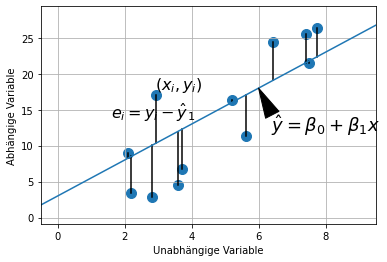

In [2]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(12)
n = 12
a = 3
b = 2.5
x = np.random.uniform(2, 8, n)
y = a + b * (x + np.random.uniform(-3, 3, n))

fig, ax = plt.subplots()


for xy in zip(x, y):
    yhat = a + b * xy[0]
    # ax.plot((xy), (xy[0], yhat))
    ax.plot((xy[0], xy[0]), (xy[1], yhat), color="k")
ax.scatter(x=x, y=y, s=100)
xaxis = np.linspace(-1, 10, 100)
regline = a + b * xaxis
ax.plot(xaxis, regline)

ax.annotate(
    r"$\hat y = \beta_0 + \beta_1x$",
    xy=(6, 18),
    xytext=(8, 12),
    arrowprops=dict(headwidth=15, headlength=30, width=4, color="k"),
    size=18,
    horizontalalignment="center",
)

ax.text(s="$(x_i, y_i)$", x=2.9, y=17.8, size=16)
ax.text(s="$e_i = y_i - \hat y_1$", x=1.6, y=13.8, size=16)

ax.set_xlim(-0.5, 9.5)
ax.grid()
ax.set_xlabel("Unabhängige Variable")
ax.set_ylabel("Abhängige Variable")

Der Fehler $e_i$ für jedes einzelne Wertepaar ($x_i,y_i$), auch **Residuum** genannt, wird aus der Differenz zwischen dem beobachteten Wert $y_i$ und dem durch $\hat{y}_i$ gegebenen vorhergesagten Wert errechnet.

$$e_i = y_i - \hat y_i$$

Je nach Datenlage ist $e_i$ eine negative Zahl, wenn $y_i$ unterhalb der Regressionslinie liegt, oder eine positive Zahl, wenn $y_i$ oberhalb der Regressionslinie liegt.

## Parameterschätzung - Methode der gewöhnlichen kleinsten Quadrate (OLS)
----------------------------------------

Da wir nun die Beschränkungen des deterministischen Modells gelockert und einen Fehlerterm $\epsilon$ eingeführt haben, stoßen wir auf ein weiteres Problem. Es gibt unendlich viele Regressionsgeraden, die die Spezifikationen des probabilistischen Modells erfüllen.

Text(0, 0.5, 'Abhängige Variable')

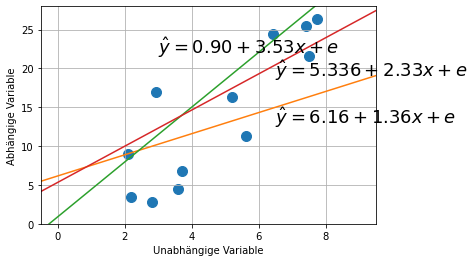

In [3]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(12)
n = 12
a = 3
b = 2.5
x = np.random.uniform(2, 8, n)
y = a + b * (x + np.random.uniform(-3, 3, n))

fig, ax = plt.subplots()
xaxis = np.linspace(-1, 10, 100)
n = 3
_b = np.random.uniform(b - 3, b + 3, n)
_a = np.random.uniform(a - 5, a + 5, n)
for e, (__a, __b) in enumerate(zip(_a, _b)):
    regline = __a + __b * xaxis
    ax.plot(xaxis, regline, color=f"C{e+1}")

# [(6.161682980460268, 1.3593855069401755),
#  (0.8958678353055358, 3.5287158712720164),
#  (5.331259776126706, 2.3273786695000847)]

ax.text(s=r"$\hat y = 0.90 + 3.53x+e$", x=3, y=22, size=18)
ax.text(s=r"$\hat y = 5.336 + 2.33x+e$", x=6.5, y=19, size=18)
ax.text(s=r"$\hat y = 6.16 + 1.36x+e$", x=6.5, y=13, size=18)

ax.scatter(x=x, y=y, s=100)


ax.set_xlim(-0.5, 9.5)
ax.set_ylim(0, 28)
ax.grid()
ax.set_xlabel("Unabhängige Variable")
ax.set_ylabel("Abhängige Variable")

Offensichtlich brauchen wir eine Strategie, um diejenige Regressionsgerade auszuwählen, die das beste Modell zur Beschreibung der Daten darstellt. In diesem Abschnitt befassen wir uns mit einer der gängigsten Methoden zur Erfüllung dieser Aufgabe, der so genannten Methode der <a href="https://de.wikipedia.org/wiki/Methode_der_kleinsten_Quadrate">gewöhnlichen kleinsten Quadrate</a> (englisch ordinary least squares, kurz: $OLS$).

Wie im vorigen Abschnitt erwähnt, wird für jedes bestimmte Wertepaar ($x_1,y_1$)
wird der Fehler $e_i$ durch $y_1-\hat y$ berechnet. Um die beste Anpassungsgerade für die gegebenen Daten zu erhalten, wird die **Summe der Fehlerquadrate**, bezeichnet als $SSE$, minimiert.

$$min\; SSE = \sum_{i=1}^n e_i^2=\sum_{i=1}^n (y - \hat y)^2$$

Für das einfache lineare Modell gibt es eine analytische Lösung für $\beta_1$

$$\hat{\beta_1} = \frac{\sum_{i=1}^n ((x_i- \bar x) (y_i-\bar y))}{\sum_{i=1}^n (x_i-\bar x)^2} = \frac{cov(x,y)}{var(x)}\text{,}$$

und $\beta_0$:

$$\hat{\beta_0} = \bar y -\hat{\beta_1} \bar x$$

Die $OLS$ liefert die Maximum-Likelihood-Schätzung für $\hat \beta$, wenn die Parameter die gleiche Varianz haben und unkorreliert sind und die Residuen $\epsilon$ unkorreliert sind und einer Gaußschen Verteilung folgen (<a href="https://de.wikipedia.org/wiki/Homoskedastizit%C3%A4t_und_Heteroskedastizit%C3%A4t">Homoskedastizität</a>).

## Einfache lineare Regression - Ein Beispiel
----------------------------------------

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress
import statsmodels.api as sm

Um einige praktische Erfahrungen zu sammeln, wenden wir die einfache lineare Regression in einer Übung an. Dazu laden wir den `students` Datensatz. Sie können die Datei `students.csv` <a href="https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv">hier</a> herunterladen. Importieren Sie den Datensatz und geben Sie ihm einen passenden Namen.

In [8]:
# Lese Datei students.csv als Dataframe ein; Indexspalte wird übersprungen
students = pd.read_csv("../../data/students.csv", index_col=0)

Der `students` Datensatz besteht aus 8239 Zeilen, von denen jede einen bestimmten Studenten repräsentiert, und 16 Spalten, von denen jede einer Variable/einem Merkmal entspricht, das sich auf diesen bestimmten Studenten bezieht. Diese selbsterklärenden Variablen sind: stud.id, name, gender, age, height, weight, religion, nc.score, semester, major, minor, score1, score2, online.tutorial, graduated, salary.

Um die **einfache lineare Regression** zu veranschaulichen, untersuchen wir die Beziehung zwischen zwei Variablen, `height` der Studenten als Prädiktorvariable und `weight` der Studierenden als Antwortvariable.

### Vorbereitung der Daten

Zur Datenaufbereitung ziehen wir eine Zufallsstichprobe von $12$ Studenten aus dem Datensatz und erstellen einen Datensatz mit den zwei Variablen von Interesse (`height` und `weight`). Außerdem stellen wir die Daten in Form eines Streudiagramms dar, um die zugrunde liegende lineare Beziehung zwischen den beiden Variablen zu visualisieren.

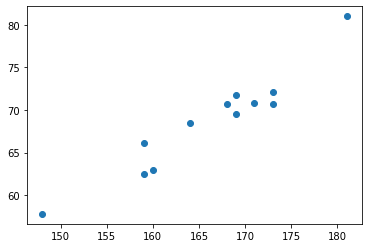

In [9]:
n = 12

data = students[["weight", "height"]].sample(n, random_state=2).sort_index()

fig, ax = plt.subplots()
ax.scatter(data["height"], data["weight"])

Die visuelle Inspektion bestätigt unsere Vermutung, dass die Beziehung zwischen der Größe und der Gewichtsvariable ungefähr linear ist. Mit anderen Worten: Mit zunehmender Größe neigt der einzelne Studierende dazu, ein höheres Gewicht zu haben.

### Schätzung der Parameter

#### Lösen für $\beta_0$ und $\beta_1$ analytisch in Python

Wie im vorherigen Abschnitt gezeigt, können die Parameter $\beta_0$ und $\beta_1$ eines einfachen linearen Modells analytisch berechnet werden. Erinnern Sie sich an die Gleichung für ein lineares Modell aus Stichprobendaten

$$\hat y = \beta_0 + \beta_1 x + e \text{,}$$

für $\beta_1$

$$\hat{\beta_1} = \frac{\sum_{i=1}^n ((x_i- \bar x) (y_i-\bar y))}{\sum_{i=1}^n (x_i-\bar x)^2} = \frac{cov(x,y)}{var(x)}\text{,}$$

und für $\beta_0$

$$\hat{\beta_0} = \bar y -\hat{\beta_1} \bar x$$

Zum besseren Verständnis verwenden wir Python, um die einzelnen Terme zu berechnen

In [10]:
# Berechne b1
x = data["height"]
y = data["weight"]
x_bar = np.mean(x)
y_bar = np.mean(y)

b1 = np.sum((x - x_bar) * (y - y_bar)) / np.sum((x - x_bar) ** 2)
b1

0.6507615230460924

Die Steigung des Regressionsmodells beträgt ungefähr $0,65$. Zur Überprüfung der Korrektheit berechnen wir das Verhältnis der Kovarianz von $x$ und $y$ mit der Funktion `cov()` und die Varianz von $x$ mit der Funktion `var()` und vergleichen es mit dem Ergebnis von oben.

In [11]:
np.cov(x, y, ddof=0)[0][1] / np.var(x)

0.6507615230460925

Eine perfekte Übereinstimmung!

Weiter berechnen wir $\beta_0$.

In [12]:
# Berechne b0
b0 = y_bar - b1 * x_bar
b0

-39.443206412825674

Der Achsenabschnitt $\beta_0$ des Regressionsmodells beträgt ungefähr $-39,44$.

Wir können also das Regressionsmodell aufschreiben

$$\text{Gewicht} = -39,44 + 0,65 \times \text{Höhe}$$

Auf der Grundlage dieser Gleichung können wir nun das Gewicht eines Studenten anhand seiner Größe bestimmen. Lassen Sie uns zum Spaß das Gewicht von Studierenden mit einer Größe von $156$, $178$ und $192$ cm vorhersagen.

$$\text{Gewicht}_{156} = -39,44 + 0,65 \times \text{156} \approx 62 \ \text{kg}$$

$$\text{Gewicht}_{178} = -39,44 + 0,65 \times \text{178} \approx 76 \ \text{kg}$$

$$\text{Gewicht}_{192} = -39,44 + 0,65 \times \text{192} \approx 85 \ \text{kg}$$

#### Verwenden Sie die Funktion `linregress()` bzw `OLS()` in Python, um $\beta_0$ zu berechnen und $\beta_1$

Zum einen können wir die Funktion `linregress()` nutzen um $\beta_0$ und $\beta_1$ zu berechnen.

In [13]:
gradient, intercept, r_value, p_value, stderr = linregress(
    data["height"], data["weight"]
)
print(f"beta_0 = {intercept}")
print(f"beta_1 = {gradient}")

beta_0 = -39.4432064128257
beta_1 = 0.6507615230460925


Eine andere Möglichkeit ist es das Paket [`statsmodels`](https://www.statsmodels.org/stable/index.html) und die Funktion `OLS()` zu nutzen, die zusätzlich zur Berechnung von $\beta_0 , \beta_1$ viele weitere Möglichkeiten bietet

In [14]:
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()

model.params

const    -39.443206
height     0.650762
dtype: float64

Die Ausgabe über die Methode `params` liefert den Achsenabschnitt und den Regressionskoeffizienten. Weiters kann die Methode `summary()` nützlich sein, wenn Sie auf andere Eigenschaft des Modellobjekts zugreifen möchten.

In [15]:
model.summary()

C:\Users\zak\anaconda3\envs\srh\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     115.9
Date:                Sun, 03 Jul 2022   Prob (F-statistic):           8.05e-07
Time:                        14:47:51   Log-Likelihood:                -22.602
No. Observations:                  12   AIC:                             49.20
Df Residuals:                      10   BIC:                             50.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -39.4432     10.057     -3.922      0.003     -61.851     -17.036
height         0.6508      0.060     10.766      0.000       0.516       0.785
==============================================================================
Omnibus:                        2.161   Durbin-Watson:                   1.778
Prob(Omnibus):                  0.339   Jarque-Bera (JB):                0.923
Skew:                           0.110   Prob(JB):                        0.630
Kurtosis:                       1.659   Cond. No.                     3.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Die Methode `conf_int()` gibt das Konfidenzintervall für die Modellkoeffizienten für ein bestimmtes Konfidenzniveau zurück (Standardeinstellung entspricht $\alpha = 0,05$.

In [16]:
model.conf_int(alpha=0.05)

,0,1
const,-61.850735,-17.035678
height,0.516081,0.785442


Eine weitere nützliche Extraktormethode ist die Funktion `resid()`.

In [17]:
model.resid

339     0.815271
2124   -1.037014
2388    1.218317
2727   -1.527876
2767   -1.035491
3594    1.164509
4152    2.655371
4433    2.072124
5100   -1.038537
7099   -2.438537
7136    0.930501
8170   -1.778637
dtype: float64

Wir können sofort überprüfen, ob die Summe der Residuen ($\sum e$) nahe bei Null liegt.

In [18]:
sum(model.resid)

9.308109838457312e-13

Cool, nahe an Null!

Um die erhaltene Regressionslinie zu zeichnen, verwenden wir die Funktion $y = \beta_0 + \beta_1 x$, die Linien auf der Grundlage des Achsenabschnitts ($\beta_0$) und der Steigung ($\beta_1$) zeichnet. Wir verwenden den Syntax `plot([x_1,x_2],[y_1,y_2])` um die Regressionsgerade zu plotten.

Eine weitere besonders interessante Extraktormethode ist `predict()`. Wenn sie nicht spezifiziert ist, gibt die Methode `predict()` $\hat y_i$ für jedes einzelne $x_i$ zurück; ähnlich wie die Methode `fittedvalues`. Man kann jedoch auch neue Daten angeben und die Funktion `predict()` wird $\hat y_i$ für jedes gegebene $x_i$ vorhersagen. Beachten Sie, dass die neuen Daten ein Data-Frame-Objekt oder eine Liste sein müssen.

In [19]:
print(model.predict(x))

339     69.884729
2124    71.837014
2388    67.281683
2727    64.027876
2767    70.535491
3594    70.535491
4152    78.344629
4433    64.027876
5100    73.138537
7099    73.138537
7136    56.869499
8170    64.678637
dtype: float64


In [20]:
model.fittedvalues

339     69.884729
2124    71.837014
2388    67.281683
2727    64.027876
2767    70.535491
3594    70.535491
4152    78.344629
4433    64.027876
5100    73.138537
7099    73.138537
7136    56.869499
8170    64.678637
dtype: float64

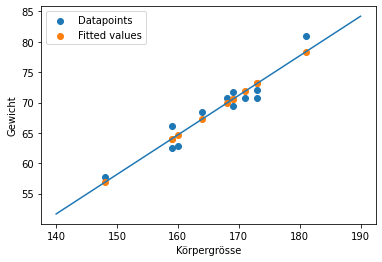

In [21]:
fig, ax = plt.subplots()
ax.scatter(data["height"], data["weight"], label="Datapoints")
ax.scatter(data["height"], model.fittedvalues, label="Fitted values")
# create regression line
x_axis = np.linspace(140, 190, 100)
_x_axis = sm.add_constant(x_axis)
ax.plot(x_axis, model.predict(_x_axis))

ax.set_ylabel("Gewicht")
ax.set_xlabel("Körpergrösse")
ax.legend()

Darüber hinaus bietet Python einen einfachen Ansatz zur Erstellung von Fehlerbereichen um die angepasste Regressionslinie. Es gibt zwei Arten von Bändern, die als *schmale* und *breite* Bänder bezeichnet werden. Die schmalen Bänder, die so genannten <a href="https://de.wikipedia.org/wiki/Konfidenzintervall">Konfidenzbänder</a>, spiegeln die Unsicherheit über die Linie selbst wider. Die Bänder sind schmal, wenn es viele Beobachtungen gibt, und spiegeln eine gut bestimmte Linie wider. Die breiten Banden, die so genannten <a href="https://de.wikipedia.org/wiki/Konfidenzintervall">Prognosebänder</a> ({cite:t}`Frost2018` s.27), beinhalten die Unsicherheit über zukünftige Beobachtungen. Diese Bänder erfassen die Mehrheit der beobachteten Punkte und fallen nicht zu einer Linie zusammen, wenn die Anzahl der Beobachtungen zunimmt.

Um diese Unsicherheitsbänder zu berechnen, wenden wir die Methode `get_prediction()` an und fügen die Methode `summary_frame()` hinzu, um den Vektor der vorhergesagten Werte zu erhalten, der mit Grenzwerten ergänzt wird.

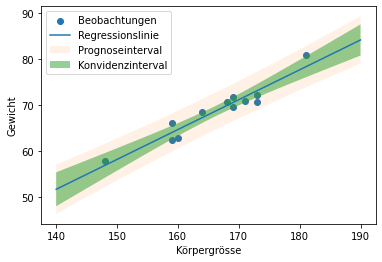

In [22]:
pred = np.linspace(140, 190)
pred = sm.add_constant(pred)
model_predictions = model.get_prediction(pred).summary_frame()

fig, ax = plt.subplots()
ax.scatter(data["height"], data["weight"], label="Beobachtungen")

# create regression line
x_axis = np.linspace(140, 190)

ax.plot(x_axis, model_predictions["mean"], label="Regressionslinie")
ax.fill_between(
    x_axis,
    model_predictions["obs_ci_lower"],
    model_predictions["obs_ci_upper"],
    alpha=0.1,
    label="Prognoseinterval",
)

ax.fill_between(
    x_axis,
    model_predictions["mean_ci_lower"],
    model_predictions["mean_ci_upper"],
    alpha=0.5,
    label="Konvidenzinterval",
)

ax.set_ylabel("Gewicht")
ax.set_xlabel("Körpergrösse")
ax.legend()

Es gibt viele weitere Attribute und Methoden eines `OLS`-Objekts auf die zugegriffen werden kann. Die Funktion `dir()` gibt einen Überblick über die Struktur des Modellobjekts.

In [23]:
dir(model)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'info_c

## Modelldiagnose
----------------------------------------

In [24]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import sample
from scipy.stats import t, chi2, linregress

# from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

<a href="https://de.wikipedia.org/wiki/Regressionsdiagnostik">Regressionsdiagnostik</a> beinhaltet eine Reihe von Verfahren, die zur Bewertung der numerischen Ergebnisse einer Regressionsanalyse angewandt werden. Die Verfahren umfassen Methoden der grafischen und quantitativen Analyse oder formale statistische Hypothesentests. In diesem Abschnitt konzentrieren wir uns auf die beiden wichtigsten Methoden, die grafische und die quantitative Analyse. Statistische Hypothesentests für Regressionsprobleme finden Sie im Abschnitt über *Hypothesentests*.

### Bestimmheitsmaß

Der <a href="https://de.wikipedia.org/wiki/Bestimmtheitsma%C3%9F">Bestimmtheitsmaß</a>, auch als $R^2$ bezeichnet, ist der Anteil der Variation der beobachteten Werte, der durch die Regressionsgleichung erklärt wird. Mit anderen Worten: $R^2$ ist ein statistisches Maß dafür, wie gut die Regressionsgerade die realen Datenpunkte annähert; es ist also ein Maß für die Anpassungsfähigkeit des Modells.

Die Gesamtvariation der Antwortvariablen $y$
basiert auf der Abweichung jedes beobachteten Wertes $y_i$ vom Mittelwert $\bar y$. Diese Größe wird als **Gesamtsumme der Quadrate, $SST$**, bezeichnet und ist gegeben durch

$$SST = \sum (y_i - \bar y)^2\text{.}$$

Diese Gesamtsumme der Quadrate ($SST$) kann in zwei Teile zerlegt werden: die durch die Regressionslinie erklärte Abweichung $\hat y_i- \bar y$ und die verbleibende unerklärte Abweichung $y_i-\hat y_i$. Folglich wird der Anteil der Variation, der durch die Regression erklärt wird, als **Summe der Quadrate aufgrund der Regression**, $SSR$, bezeichnet und ist gegeben durch

$$SSR = \sum (\hat y_i- \bar y)^2\text{.}$$

Das Verhältnis zwischen der Summe der Quadrate aufgrund der Regression ($SSR$) und der Gesamtsumme der Quadrate ($SST$) wird als Bestimmtheitsmaß bezeichnet und mit $R^2$ angegeben.

$$R^2 = \frac{SSR}{SST}$$

$R^2$ liegt zwischen $0$ und $1$. Ein Wert nahe $0$ deutet darauf hin, dass die Regressionsgleichung nicht in der Lage ist, die Daten zu erklären. Ein $R^2$ von $1$ zeigt an, dass die Regressionsgerade perfekt zu den Daten passt.

Der Vollständigkeit halber wird die Variation in den beobachteten Werten der Reaktionsvariablen, die nicht durch die Regression erklärt wird, als **Summe der quadrierten Fehler der Vorhersage** ($SSE$) bezeichnet und ist gegeben durch

$$SSE = \sum (y_i-\hat y_i)^2\text{.}$$

Erinnern Sie sich, dass die $SSE$-Größe minimiert wird, um die beste Regressionslinie zur Beschreibung der Daten zu erhalten, auch bekannt als die <a href="https://de.wikipedia.org/wiki/Methode_der_kleinsten_Quadrate">Methode der gewöhnlichen kleinsten Quadrate</a> ($OLS$).

### Die Methode `summary()`

Eine grundlegendes Mittel für die Regressionsdiagnose in Python ist die Methode `summary()`. Die Funktion `OLS()` gibt ein Modellobjekt zurück. Dieses `OLS()`-Objekt enthält die Modelleigenschaften, die durch Anwendung der Methode `summary()` untersucht werden können.

Zu Demonstrationszwecken wird dasselbe Modell wie im vorherigen Abschnitt verwendet.

In [25]:
# Lese Datei students.csv als Dataframe ein; Indexspalte wird übersprungen
students = pd.read_csv("../../data/students.csv", index_col=0)

n = 12

data = students[["height", "weight"]].sample(n, random_state=2)
x = data["height"]
y = data["weight"]

x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
predictions = model.predict(x)  # make the predictions by the model

# Lese Modellwerte aus
model.summary()

C:\Users\zak\anaconda3\envs\srh\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     115.9
Date:                Sun, 03 Jul 2022   Prob (F-statistic):           8.05e-07
Time:                        14:49:20   Log-Likelihood:                -22.602
No. Observations:                  12   AIC:                             49.20
Df Residuals:                      10   BIC:                             50.17
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -39.4432     10.057     -3.922      0.003     -61.851     -17.036
height         0.6508      0.060     10.766      0.000       0.516       0.785
==============================================================================
Omnibus:                        2.161   Durbin-Watson:                   1.442
Prob(Omnibus):                  0.339   Jarque-Bera (JB):                0.923
Skew:                           0.110   Prob(JB):                        0.630
Kurtosis:                       1.659   Cond. No.                     3.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Die Ausgabe der Methode `summary()` beginnt mit einer Wiederholung der abhängigen Variable und der angewandten Methode (in diesem Fall $OLS$).

- Die nächste Zeile zeigt $R^2$, den quadrierten <a href="https://de.wikipedia.org/wiki/Korrelationskoeffizient">Pearson Korrelationskoeffizienten</a>, auch bekannt als <a href="https://de.wikipedia.org/wiki/Bestimmtheitsma%C3%9F">Bestimmtheitsmaß</a> und das angepasste $R^2$, ein statistisches Maß, das für die Merkmalsauswahl bei der Regressionsanalyse mit mehreren Prädiktoren (multiple Regression) verwendet werden kann.

- Die darauf folgenden Zeilen zeigen die $F$-Statistik, die Anzahl der Beobachtungen (Datenpunkte) und Freiheitsgrade.

- In den nächsten Zeilen werden der Regressionskoeffizient (unter `height`) und der Achsenabschnitt (unter `const`) angegeben, außerdem für jeden von ihnen der Standardfehler, die $t$-Werte und die $p$-Werte.


### Diagnostische Plots

Es ist wichtig zu wissen, dass Sie eine lineare Regressionsanalyse mit dem Softwarepaket Python oder einer anderen Statistiksoftware durchführen können, die eine Reihe von Zahlen, einschließlich eines $p$-Werts, ergibt, so dass Sie sofort feststellen können, ob die Ergebnisse signifikant waren (oder nicht). Sind wir mit der Angabe der Signifikanz der Ergebnisse fertig?

Nehmen wir einen sehr berühmten Datensatz, das so genannte <a href="https://de.wikipedia.org/wiki/Anscombe-Quartett">Anscombe-Quartett</a>. Das Anscombe-Quartett besteht aus vier Datensätzen und hat die folgende Form:

|||||||||
|--- |--- |--- |--- |--- |--- |--- |--- |
|x1|y1|x2|y2|x3|y3|x4|y4|
|10 |8,04|10|9,14|10|7,46|8|6,58|
|8|6,95|8|8,14|8|6,77|8|5,76|
|13|7,58|13|8,74|13|12,74|8|7,71|
|9|8,81|9|8,77|9|7,11|8|8,84|
|11|8,33|11|9,26|11|7,81|8|8,47|
|14|9,96|14|8,1|14|8,84|8|7,04|
|6|7,24|6|6,13|6|6,08|8|5,25|
|4|4,26|4|3,1|4|5,39|19|12,5|
|12|10,84|12|9,13|12|8,15|8|5,56|
|7|4,82|7|7,26|7|6,42|8|7,91|
|5|5,68|5|4,74|5|5,73|8 |6,89|

Das Anscombe-Quartett wird oft verwendet um die Unterschiede zwischen grafischer und statistischer Auswertung hervorzuheben. Wir geben den Datensatz in Python ein.

In [26]:
x1 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]

x2 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]

x3 = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]

x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

X = [x1, x2, x3, x4]
Y = [y1, y2, y3, y4]

Nun berechnen wir einige deskriptive statistische Maße für jedes der vier $(x,y)$-Paare. Zunächst berechnen wir den Mittelwert für jedes einzelne $x$ und $y$ im Datensatz.

In [27]:
for e, (x, y) in enumerate(zip(X, Y)):
    print(f"mean x{e+1}: {round(np.mean(x),3)} | mean y{e+1}: {round(np.mean(y),3)}")

mean x1: 9.0 | mean y1: 7.501
mean x2: 9.0 | mean y2: 7.501
mean x3: 9.0 | mean y3: 7.5
mean x4: 9.0 | mean y4: 7.501


Die Werte stimmen entweder perfekt überein oder liegen sehr nahe beieinander!!

Jetzt berechnen wir die Varianz jedes $(x,y)$ Paares.

In [28]:
for e, (x, y) in enumerate(zip(X, Y)):
    print(
        f"variance x{e+1}: {round(np.var(x),3)} | variance y{e+1}: {round(np.var(y),3)}"
    )

variance x1: 10.0 | variance y1: 3.752
variance x2: 10.0 | variance y2: 3.752
variance x3: 10.0 | variance y3: 3.748
variance x4: 10.0 | variance y4: 3.748


Sie sind zwar nicht exakt gleich, aber definitiv sehr nahe beieinander. Schließlich erstellen wir mit der Funktion `linregress()` ein lineares Modell für jede Teilmenge und berechnen die Koeffizienten des Modells und $R^2$, das Bestimmtheitsmaß.

In [29]:
for e, (x, y) in enumerate(zip(X, Y)):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    print(
        f"{e+1}: {round(slope,2)}x + {round(intercept,2)},  p-value: {round(p_value,5)}, Pearson correlation coefficient: {round(r_value,3)}, Standard error of the estimated slope: {round(std_err,4)}"
    )

1: 0.5x + 3.0,  p-value: 0.00217, Pearson correlation coefficient: 0.816, Standard error of the estimated slope: 0.1179
2: 0.5x + 3.0,  p-value: 0.00218, Pearson correlation coefficient: 0.816, Standard error of the estimated slope: 0.118
3: 0.5x + 3.0,  p-value: 0.00218, Pearson correlation coefficient: 0.816, Standard error of the estimated slope: 0.1179
4: 0.5x + 3.0,  p-value: 0.00216, Pearson correlation coefficient: 0.817, Standard error of the estimated slope: 0.1178


Erstaunlich! Sie sind fast identisch! Und jetzt $R^2$:

In [30]:
for e, (x, y) in enumerate(zip(X, Y)):
    _, _, r_value, _, _ = linregress(x, y)
    print(
        f"r2: {round(r_value**2,3)}",
    )

r2: 0.667
r2: 0.666
r2: 0.666
r2: 0.667


Wow, was für eine Analyse! Wir haben eine Menge verschiedener statistischer Methoden auf die vier Datensätze angewandt, und ehrlich gesagt, sie sehen einander sehr ähnlich.

Sind wir jetzt mit unserer Analyse fertig? Nein, noch nicht! Egal was wir tun, wir sollten immer überprüfen, ob das Modell für die Daten gut funktioniert. Eine einfache Möglichkeit, dies zu tun, ist die Visualisierung der Daten. Lassen Sie uns den Anscombe-Datensatz einschließlich der Regressionslinie grafisch darstellen.

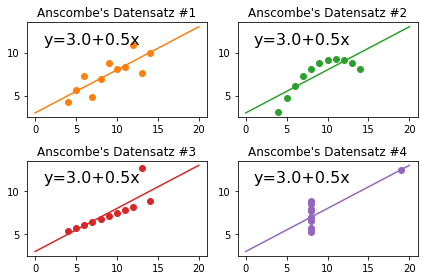

In [31]:
fig, ax = plt.subplots(ncols=2, nrows=2)
ax = np.ravel(ax)
xaxis = np.linspace(0, 20, 100)
for e, (x, y) in enumerate(zip(X, Y)):
    slope, intercept, _, _, _ = linregress(x, y)
    regline = intercept + slope * xaxis
    ax[e].plot(xaxis, regline, color=f"C{e+1}")
    ax[e].scatter(x, y, color=f"C{e+1}")
    ax[e].set_title(f"Anscombe's Datensatz #{e+1}")
    ax[e].text(s=f"y={round(intercept,2)}+{round(slope,3)}x", x=1, y=11, size=16)
fig.tight_layout()

Was für eine Überraschung! Das wichtigste Ergebnis der Übung ist die Erkenntnis, dass wir auf viele verschiedene Arten prüfen müssen, ob ein Modell für Daten gut funktioniert. Wir achten auf Regressionsergebnisse wie Steigungskoeffizienten, $p$-Werte oder $R^2$, die uns sagen, wie gut ein Modell die gegebenen Daten darstellt. Das ist jedoch nicht die ganze Geschichte. Wir müssen auch visuelle Diagnosen anwenden. Die visuelle Inspektion hilft bei der Bewertung, ob die Annahmen der linearen Regression erfüllt sind, oder bei der Ermittlung von <a href="https://de.wikipedia.org/wiki/Ausrei%C3%9Fer">Ausreißern</a> und/oder <a href="https://ethz.ch/content/dam/ethz/special-interest/math/statistics/sfs/Education/Advanced%20Studies%20in%20Applied%20Statistics/course-material-1921/Regression/reg-script-full.pdf">statistisch bedeutsame Beobachtungen</a> und so genannten <a href="https://de.wikipedia.org/wiki/Pr%C3%A4diktionsmatrix#Hebelwerte">Hebelwerte</a>, die das numerische Ergebnis der Regressionsanalyse beeinflussen.

### Analyse der Residuen

Ein <a href="https://de.wikipedia.org/wiki/St%C3%B6rgr%C3%B6%C3%9Fe_und_Residuum">Residuum</a> eines beobachteten Wertes ist die Differenz zwischen dem beobachteten Wert und dem geschätzten Wert $(y_i- \hat y_i)$. Es handelt sich um die Residuen, die nach der Anpassung eines Modells an die Daten übrig bleiben. Die **Summe der quadrierten Vorhersagefehler** ($SSE$), auch bekannt als die **Summe der quadrierten Residuen** oder die **Fehlersumme der Quadrate**, ist ein Indikator dafür, wie gut ein Modell die Daten darstellt.

Wenn die absoluten Residuen, definiert für die Beobachtung $x_i$ als $e_i=y_i- \hat y_i$ definiert sind, ungewöhnlich groß sind, kann es sein, dass die Beobachtung aus einer anderen Grundgesamtheit stammt oder dass bei der Durchführung oder Aufzeichnung der Beobachtung ein Fehler aufgetreten ist.

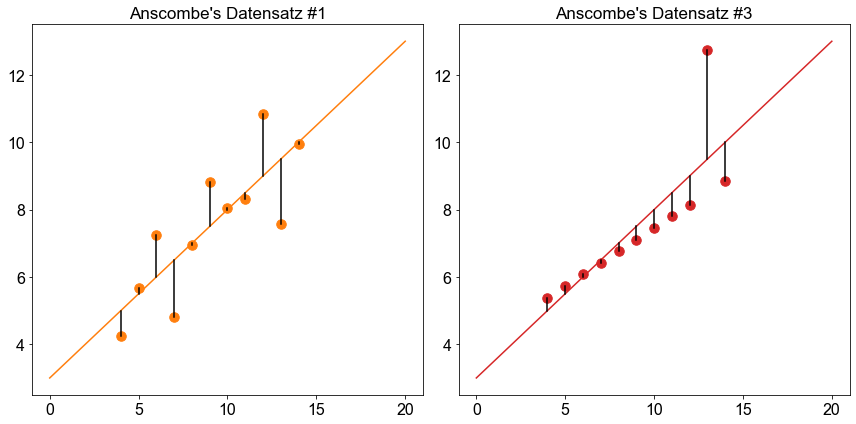

In [10]:
fig, ax = plt.subplots(ncols=2)
xaxis = np.linspace(0, 20, 100)
colors = ["C1", "C3"]
for e, (x, y) in enumerate(zip((X[0], X[2]), (Y[0], Y[2]))):
    slope, intercept, _, _, _ = linregress(x, y)
    regline = intercept + slope * xaxis
    ax[e].plot(xaxis, regline, color=colors[e])
    ax[e].scatter(x, y, s=90, color=colors[e])
    for _x, _y in zip(x, y):
        yhat = intercept + slope * _x
        ax[e].plot((_x, _x), (_y, yhat), color="k")
    ax[e].set_title(f"Anscombe's Datensatz #{colors[e][1:]}")
fig.tight_layout()

Die beiden obigen Diagramme zeigen, dass ein Datenpunkt in Anscombes Datensatz Nr. $3$ (rechtes Diagramm) ein ungewöhnlich großes Residuum aufweist. Ein solcher Datenpunkt erfordert besondere Aufmerksamkeit, da er die Regressionsanalyse beeinflusst. Es gibt keine allgemeingültige Regel, wie mit Ausreißern umzugehen ist, aber je nach den Fachkenntnissen des Forschers kann es Fälle geben, in denen man beschließt, einen solchen Ausreißer aus der Analyse auszuschließen.

Darüber hinaus können wir die Residuen analysieren, um zu prüfen, ob die Annahmen der linearen Regression erfüllt sind. Regressionsresiduen sollten annähernd normalverteilt sein, d. h. die Regression sollte die Struktur erklären, und was übrig bleibt, sollte nur Rauschen sein, das durch Messfehler oder viele kleine unkorrelierte Faktoren verursacht wird. Die Normalität der Residuen kann grafisch überprüft werden, indem man die Residuen gegen die Werte der Prädiktorvariablen aufträgt. In einem solchen **Residuen-Plot** sollten die Residuen zufällig um $0$ streuen
und die Variation um $0$ sollte gleich sein.

Vor der Darstellung der Residuen ist es üblich, die Residuen zu standardisieren. Python bietet die Möglichkeit mit `get_influence()` auf die standardisierten Residuen zuzugreifen (`influence = model.get_influence()
` und `standardized_residuals = influence.resid_studentized_internal`) und alternativ kann man mit `stud_res = model.outlier_test()` die studentisierten Residuen ({cite:t}`fahrmeirstatistik` s.152) berechnen.

Wenn die Annahmen für Regressionsschlussfolgerungen erfüllt sind, sollten die folgenden zwei Bedingungen gelten ({cite:t}`fahrmeirstatistik` s.443):
- Eine Darstellung der Residuen (Residuenplot) gegen die Werte der Prädiktorvariablen sollte ungefähr in ein horizontales Band fallen, das um die $x$-Achse zentriert und symmetrisch ist.

- Eine Normalwahrscheinlichkeitsdarstellung der Residuen sollte in etwa linear sein.

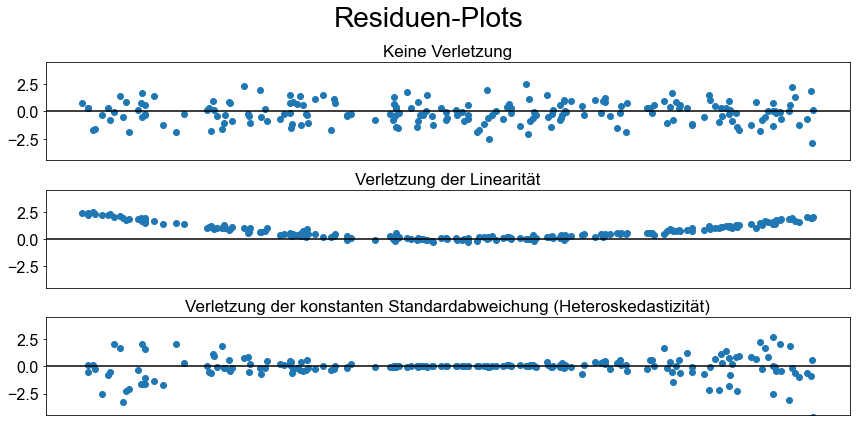

In [11]:
n = 200
toy_x = np.random.uniform(-100, 100, n)
toy1_y = 5 * toy_x + np.random.normal(0, 25, n)
toy2_y = toy_x**2 + np.random.normal(0, 25**2, n)
eps = 100 + 5 * (toy_x) ** 2
toy3_y = 4 * np.abs(toy_x) + np.random.normal(25, eps, n)

toys = [toy1_y, toy2_y, toy3_y]
titles = [
    "Keine Verletzung",
    "Verletzung der Linearität",
    "Verletzung der konstanten Standardabweichung (Heteroskedastizität)",
]
x = sm.add_constant(toy_x)

fig, ax = plt.subplots(nrows=len(toys))
for e, toy in enumerate(toys):

    _model = sm.OLS(toy, toy_x).fit()
    influence = _model.get_influence()
    standardized_residuals = influence.resid_studentized_internal

    ax[e].scatter(toy_x, standardized_residuals)
    ax[e].set_title(titles[e])
    ax[e].set_xticks([])
    ax[e].set_ylim(-4.5, 4.5)
    ax[e].axhline(0, color="k")
fig.tight_layout()
fig.suptitle("Residuen-Plots", size=28)
fig.subplots_adjust(top=0.85)

Nur in der obersten Grafik sind die Residuen relativ gut um den Nullpunkt verteilt, während dies in den beiden unteren Grafiken nicht der Fall ist, was darauf hindeutet, dass die linearen Modellannahmen für dieses Modell nicht erfüllt sind.

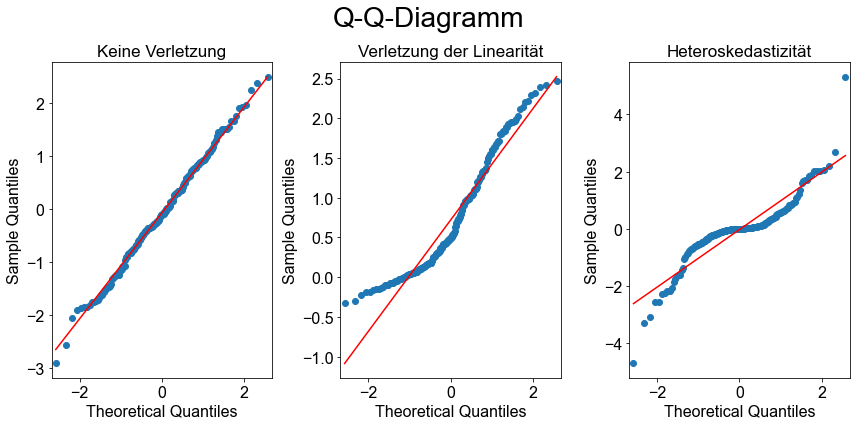

In [12]:
toys = [toy1_y, toy2_y, toy3_y]
titles = [
    "Keine Verletzung",
    "Verletzung der Linearität",
    "Heteroskedastizität",
]
fig, ax = plt.subplots(ncols=len(toys))
for e, toy in enumerate(toys):
    _model = sm.OLS(toy, toy_x).fit()
    influence = _model.get_influence()
    standardized_residuals = influence.resid_studentized_internal
    sm.qqplot(standardized_residuals, line="s", ax=ax[e])
    ax[e].set_title(titles[e])

fig.tight_layout()
fig.suptitle("Q-Q-Diagramm", size=28)
fig.subplots_adjust(top=0.85)

Die Normalwahrscheinlichkeitsdiagramme, die oft als <a href="https://de.wikipedia.org/wiki/Quantil-Quantil-Diagramm">Q-Q-Diagramme</a> bezeichnet werden, zeigen, dass nur im linken Diagramm die Datenpunkte in etwa auf eine gerade Linie fallen. Dies ist bei den anderen Diagrammen nicht der Fall, was darauf hindeutet, dass die Annahmen des linearen Modells nicht erfüllt sind.

### Ausreißer und einflußreiche Beobachtungen

**Ausreißer** sind Punkte, die aus der Wolke der Datenpunkte herausfallen. Ausreißer, die horizontal von der Mitte der Wolke wegfallen und die Neigung der Regressionslinie nicht beeinflussen, werden als **Leverage-Werte** (Hebelwerte) bezeichnet. Ausreißer, die die Steigung der Regressionsgeraden tatsächlich beeinflussen, werden als **einflußreiche Beobachtungen** bezeichnet, bei denen es sich in der Regel um hohe Leverage-Punkte handelt.

Wir wollen einen Beispielsdatensatz erstellen, um das Konzept der statistisch bedeutsamen Beobachtungen zu untersuchen.

(-1.65, 12.65, -23.52561113057294, 125.83725556438257)

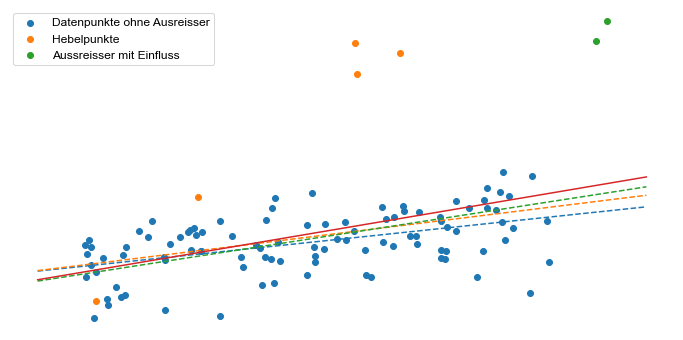

In [13]:
np.random.seed(110)  # seede zufallswerte

# Erzeuge Zufallswerte
n = 100
beta0 = 5
beta1 = 2.5

x = np.random.uniform(0, 10, n)
y = beta0 + beta1 * x + np.random.normal(loc=0, scale=12, size=n)  # add random noise

# Erzeuge Hebelwerte
n_lev = math.floor(n * 0.05)
x_lev = np.random.uniform(0, 8, n_lev)
y_lev = (
    beta0**1.5 + beta1**3 * x_lev + np.random.normal(loc=0, scale=12, size=n_lev)
)  # add random noise

# Erzeuge einflußreiche Beobachtungen
n_inf = math.floor(n * 0.02)
x_inf = np.random.uniform(10, 15, n_inf)
y_inf = beta0 + beta1**2.5 * x_inf + np.random.normal(loc=0, scale=12, size=n_inf)


# Baue Datensätze
x_full = np.hstack([x, x_inf, x_lev])
y_full = np.hstack([y, y_inf, y_lev])

# Fitte lineares Modell
base_model = sm.OLS(y, sm.add_constant(x)).fit()
lev_model = sm.OLS(np.hstack([y, y_lev]), sm.add_constant(np.hstack([x, x_lev]))).fit()
inf_model = sm.OLS(np.hstack([y, y_inf]), sm.add_constant(np.hstack([x, x_inf]))).fit()
full_model = sm.OLS(y_full, sm.add_constant(x_full)).fit()


fig, ax = plt.subplots()
ax.scatter(x, y, label="Datenpunkte ohne Ausreisser")
ax.scatter(x_lev, y_lev, label="Hebelpunkte")
ax.scatter(x_inf, y_inf, label="Aussreisser mit Einfluss")

xaxis = np.linspace(-1, 12, 100)
for _model in [base_model, lev_model, inf_model]:
    pred = _model.predict(sm.add_constant(xaxis))
    plt.plot(xaxis, pred, linestyle="dashed")
pred_full = full_model.predict(sm.add_constant(xaxis))
plt.plot(xaxis, pred_full)
ax.legend()
ax.axis("off")

Die obige Abbildung zeigt deutlich die Auswirkungen der verschiedenen Arten von Ausreißern. Die blaue gestrichelte Linie zeigt die Regressionslinie ohne Ausreißer, die orange gestrichelte Linie zeigt die Regressionslinie, wenn die orangen Hebelpunkte enthalten sind, die grüne gestrichelte Linie zeigt die Regressionslinie, wenn die grünen Ausreisser enthalten sind, und die rote Linie zeigt die Regressionslinie, wenn alle Daten enthalten sind. Offensichtlich haben die grünen Punkte den größten Einfluss auf die Steigung der Regressionslinie!

#### Leverage

Die <a href="https://de.wikipedia.org/wiki/Pr%C3%A4diktionsmatrix#Hebelwerte">Leverage</a> einer Beobachtung zeigt an, ob sie das Regressionsmodell beeinflussen kann. Diese Beobachtungen sind nicht notwendigerweise ein Fehler, aber sie sollten identifiziert und überprüft werden. Die Leverage wird durch den **$H$-Wert** gemessen, der den Gesamteinfluss einer einzelnen Beobachtung auf die Modellvorhersagen misst. Der $H$-Wert nimmt Werte zwischen $0$ und $1$ an. Ein Punkt mit einer Hebelwirkung von Null hat keinen Einfluss auf das Regressionsmodell. Je höher der $H$-Wert ist, desto größer ist der Einfluss des betreffenden Punktes auf das Regressionsmodell.


#### Cook-Abstand

Eine weitere Methode zur Erfassung einflussreicher Ausreißer ist der <a href="https://de.wikipedia.org/wiki/Cook-Abstand">Cook-Abstand</a>. Das Maß ist eine Kombination aus Leverage und Residuen der einzelnen Beobachtungen. Je höher die Hebelwirkung und der Rückstand, desto größer ist der Cook-Abstand. Normalerweise werden Punkte mit einem Cook-Abstand von mehr als $1$ als einflussreich eingestuft. In Python wird der Cook-Abstand mit dem Attribut `cooks.distance` berechnet.

#### Andere nützliche Regressionsdiagnosen

Weitere nützliche Werkzeuge für die Regressionsanalysediagnose sind DFFITS ("difference in fit(s)"), die angibt, wie sehr eine Beobachtung den zugehörigen angepassten Wert beeinflusst, und die DFBETAS, die die Änderung der geschätzten Parameter angibt, wenn eine Beobachtung im Verhältnis zu ihrem Standardfehler ausgeschlossen wird.

In Paket statsmodels kann auf diese die genanten und weitere diagnostische Verfahren sehr leicht über die Methdode `get_influence().summary_frame()`zurückgegriffen werden. 

In [14]:
full_model.get_influence().summary_frame().sample(12)

,dfb_const,dfb_x1,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
17,-0.008556,-0.006683,0.000378,-0.274503,0.009938,-0.027502,-0.273291,-0.027380
5,-0.000263,0.009673,0.000158,0.152658,0.013345,0.017754,0.151946,0.017671
19,0.066637,-0.022027,0.004280,0.924806,0.009908,0.092515,0.924163,0.092451
86,-0.075890,0.031410,0.004754,-0.949855,0.010429,-0.097511,-0.949408,-0.097465
39,0.003107,-0.002012,0.000006,0.027135,0.014813,0.003327,0.027006,0.003311
82,0.023955,-0.091890,0.009254,-1.028980,0.017179,-0.136041,-1.029271,-0.136080
21,0.027092,-0.097669,0.010127,-1.061836,0.017647,-0.142317,-1.062488,-0.142404
36,0.040591,-0.033427,0.000833,0.236372,0.028942,0.040807,0.235306,0.040623
64,-0.068953,0.023327,0.004514,-0.948047,0.009946,-0.095021,-0.947586,-0.094975
69,0.009371,-0.006311,0.000049,0.077862,0.015872,0.009888,0.077493,0.009841


Ebenso stehen Visualisierungsmethoden zur Auswahl.

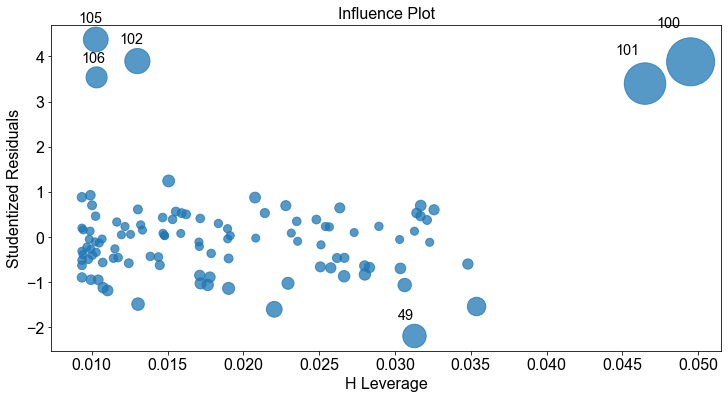

In [15]:
_ = sm.graphics.influence_plot(full_model, criterion="cooks")

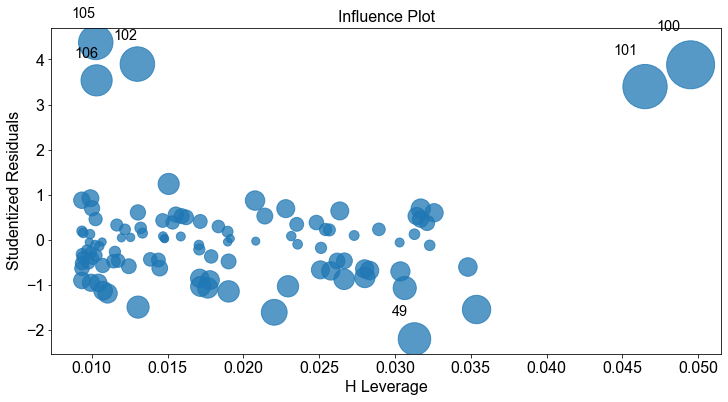

In [16]:
_ = sm.graphics.influence_plot(full_model, criterion="DFFITS")